In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
df = load_iris()
dfn = pd.DataFrame(df.data, columns=df.feature_names)

In [3]:
dfn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
dfn = dfn.drop(dfn.iloc[:,0:2], axis='columns')
dfn

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


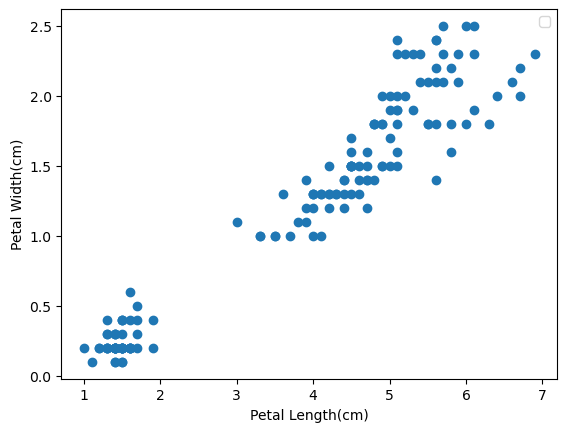

In [7]:
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.scatter( dfn["petal length (cm)"],dfn['petal width (cm)'])
plt.legend()

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans()
km

KMeans()

In [10]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dfn[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

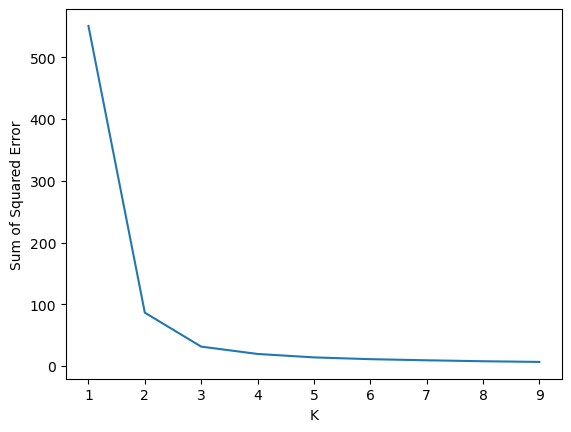

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,sse)

In [22]:
kmc = KMeans(n_clusters=3)
kmc


KMeans(n_clusters=3)

In [23]:
y_predicted = kmc.fit_predict(dfn[['petal length (cm)', 'petal width (cm)']])

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
dfn['Cluster'] = y_predicted
dfn

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
scaler.fit(dfn[['petal length (cm)']])
dfn["petal length (cm)"] = scaler.transform(dfn[['petal length (cm)']])
dfn["petal length (cm)"].head()

0    0.067797
1    0.067797
2    0.050847
3    0.084746
4    0.067797
Name: petal length (cm), dtype: float64

In [27]:
scaler.fit(dfn[['petal width (cm)']])
dfn['petal width (cm)'] = scaler.transform(dfn[['petal width (cm)']])
dfn['petal width (cm)'].head()

0    0.041667
1    0.041667
2    0.041667
3    0.041667
4    0.041667
Name: petal width (cm), dtype: float64

In [28]:
dfn.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [29]:
df1 = dfn[dfn.Cluster==0]
df2 = dfn[dfn.Cluster==1]
df3 = dfn[dfn.Cluster==2]

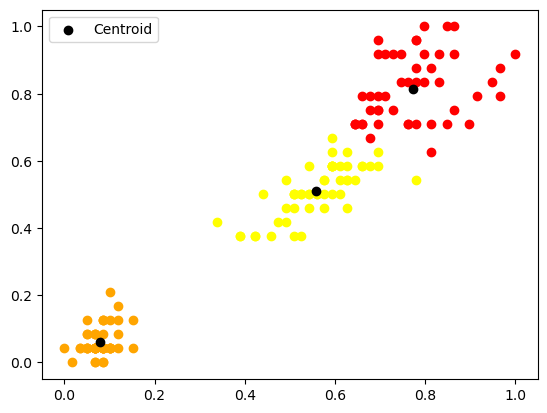

In [31]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='orange')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='yellow')
plt.scatter(kmc.cluster_centers_[:,0],kmc.cluster_centers_[:,1], color="black", label="Centroid")
plt.legend()